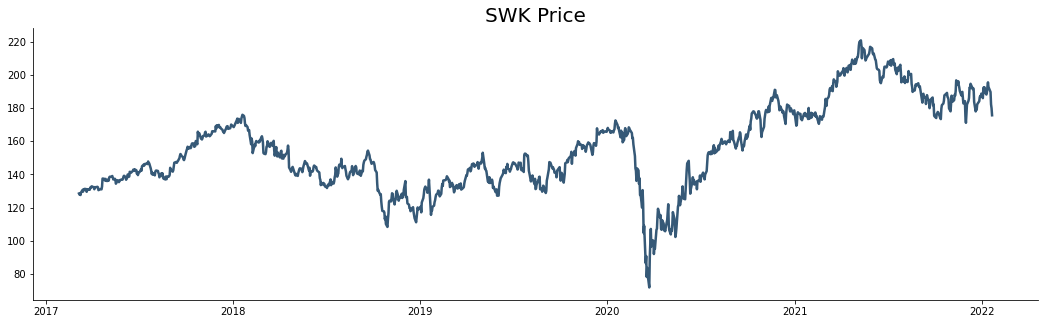

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('SWK.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('SWK Price', size=20)
plt.plot(df);

In [5]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [6]:
df

,SWK
Date,
2017-03-06,128.56
2017-03-07,127.91
2017-03-08,128.27
2017-03-09,127.63
2017-03-10,129.19
...,...
2022-01-14,192.65
2022-01-18,189.61
2022-01-19,182.18


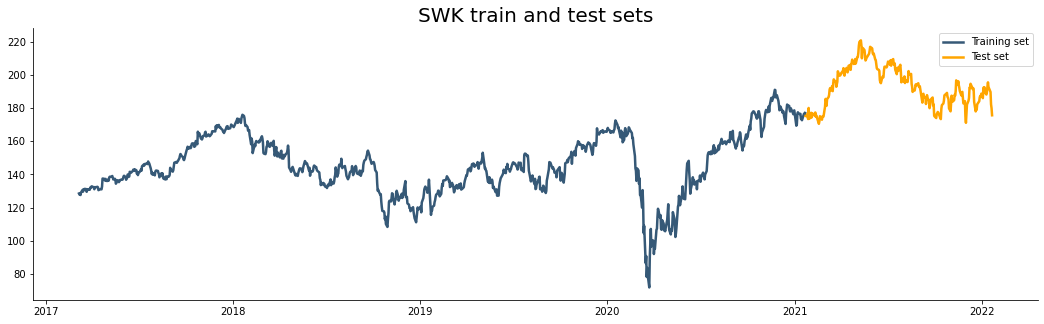

In [7]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('SWK train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [8]:
from fbprophet import Prophet as proph

In [9]:
df_train

,SWK
Date,
2017-03-06,128.56
2017-03-07,127.91
2017-03-08,128.27
2017-03-09,127.63
2017-03-10,129.19
...,...
2021-01-14,173.17
2021-01-15,172.63
2021-01-19,176.56


In [10]:
df_train.reset_index(inplace=True)

In [11]:
df_test

,SWK
Date,
2021-01-22,175.21
2021-01-25,174.99
2021-01-26,176.62
2021-01-27,173.35
2021-01-28,180.02
...,...
2022-01-14,192.65
2022-01-18,189.61
2022-01-19,182.18


In [12]:
df_test.reset_index(inplace=True)

In [13]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'SWK': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'SWK': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,128.56
1,2017-03-07,127.91
2,2017-03-08,128.27
3,2017-03-09,127.63
4,2017-03-10,129.19


In [14]:
x_test = ts_test[['ds']]

In [15]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [16]:
# Fit the timeseries into Model
Model.fit(ts)

In [17]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [18]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [19]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [20]:
x_test = pd.DataFrame(x_test)

In [21]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [22]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [23]:
forecast = Model.predict(future_dates)

In [24]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,303.489856,58.587804,563.309836,43.906429,542.460620,19.685857,19.685857,19.685857,10.155095,...,0.392120,0.392120,0.392120,9.138642,9.138642,9.138642,0.0,0.0,0.0,323.175713
755,2023-02-16,303.667999,66.380193,558.517940,44.062972,543.556060,19.608130,19.608130,19.608130,10.155095,...,0.426759,0.426759,0.426759,9.026276,9.026276,9.026276,0.0,0.0,0.0,323.276129
756,2023-02-17,303.846142,69.831410,561.967017,44.257763,544.631849,19.742024,19.742024,19.742024,10.155095,...,0.725822,0.725822,0.725822,8.861106,8.861106,8.861106,0.0,0.0,0.0,323.588165
757,2023-02-18,304.024284,62.584283,560.586196,44.452553,544.972983,17.522417,17.522417,17.522417,10.155095,...,-1.269387,-1.269387,-1.269387,8.636709,8.636709,8.636709,0.0,0.0,0.0,321.546702
758,2023-02-19,304.202427,69.504083,559.650547,44.582945,545.311008,17.233028,17.233028,17.233028,10.155095,...,-1.269387,-1.269387,-1.269387,8.347320,8.347320,8.347320,0.0,0.0,0.0,321.435455


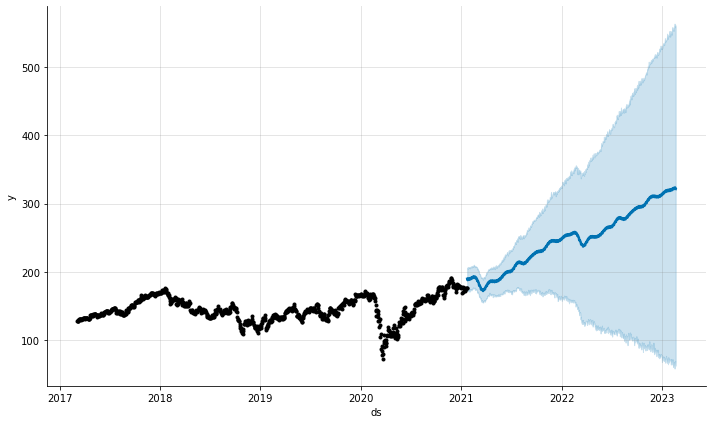

In [25]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

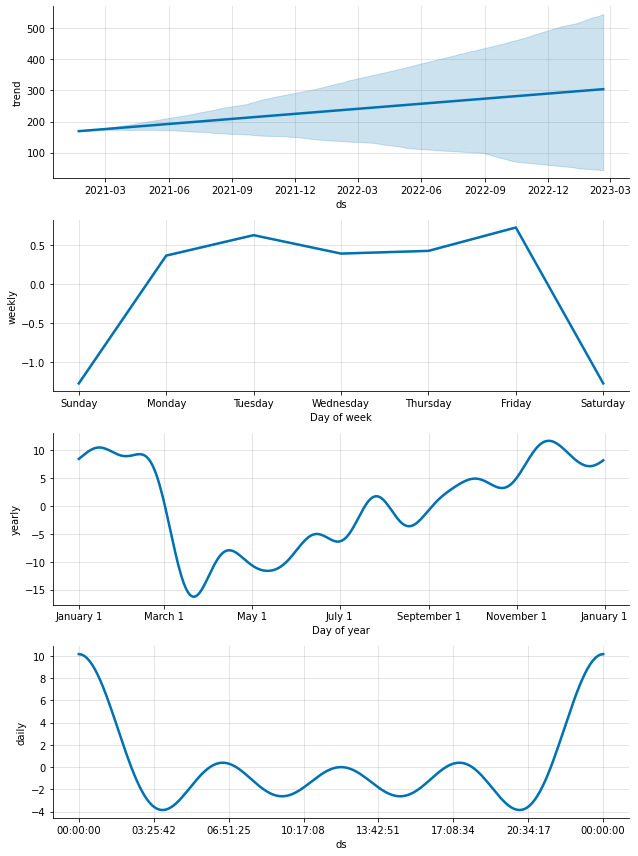

In [26]:
Model.plot_components(forecast)
plt.show()

In [27]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,SWK,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,175.21,2021-01-22,169.170254,174.016033,206.718046,169.170254,169.170254,20.820315,20.820315,...,0.725822,0.725822,0.725822,9.939397,9.939397,9.939397,0.0,0.0,0.0,189.990569
1,2021-01-25,174.99,2021-01-25,169.704682,173.233970,205.865186,169.687873,169.715811,20.070004,20.070004,...,0.366341,0.366341,0.366341,9.548568,9.548568,9.548568,0.0,0.0,0.0,189.774686
2,2021-01-26,176.62,2021-01-26,169.882825,174.609489,206.568434,169.827799,169.921937,20.203021,20.203021,...,0.627732,0.627732,0.627732,9.420194,9.420194,9.420194,0.0,0.0,0.0,190.085847
3,2021-01-27,173.35,2021-01-27,170.060968,172.984164,206.475015,169.969313,170.172879,19.846231,19.846231,...,0.392120,0.392120,0.392120,9.299015,9.299015,9.299015,0.0,0.0,0.0,189.907199
4,2021-01-28,180.02,2021-01-28,170.239111,172.730129,205.081208,170.086418,170.385922,19.770293,19.770293,...,0.426759,0.426759,0.426759,9.188439,9.188439,9.188439,0.0,0.0,0.0,190.009403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,192.65,2022-01-14,232.767201,169.183125,339.975340,149.903963,317.818951,21.281964,21.281964,...,0.725822,0.725822,0.725822,10.401046,10.401046,10.401046,0.0,0.0,0.0,254.049165
249,2022-01-18,189.61,2022-01-18,233.479772,168.763569,344.886095,149.121791,320.218785,21.132435,21.132435,...,0.627732,0.627732,0.627732,10.349607,10.349607,10.349607,0.0,0.0,0.0,254.612207
250,2022-01-19,182.18,2022-01-19,233.657915,167.017894,340.376514,149.062842,320.782663,20.826968,20.826968,...,0.392120,0.392120,0.392120,10.279752,10.279752,10.279752,0.0,0.0,0.0,254.484883
251,2022-01-20,179.85,2022-01-20,233.836057,170.805000,345.053501,149.003892,321.346541,20.773082,20.773082,...,0.426759,0.426759,0.426759,10.191228,10.191228,10.191228,0.0,0.0,0.0,254.609139


In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,169.170254,173.108943,206.542833,169.170254,169.170254,20.820315,20.820315,20.820315,10.155095,...,0.725822,0.725822,0.725822,9.939397,9.939397,9.939397,0.0,0.0,0.0,189.990569
1,2021-01-23,169.348397,171.908828,205.233123,169.348397,169.350979,18.697733,18.697733,18.697733,10.155095,...,-1.269387,-1.269387,-1.269387,9.812025,9.812025,9.812025,0.0,0.0,0.0,188.046130
2,2021-01-24,169.526540,171.854247,204.703863,169.523105,169.546171,18.566165,18.566165,18.566165,10.155095,...,-1.269387,-1.269387,-1.269387,9.680457,9.680457,9.680457,0.0,0.0,0.0,188.092705
3,2021-01-25,169.704682,172.381825,205.403351,169.670788,169.759207,20.070004,20.070004,20.070004,10.155095,...,0.366341,0.366341,0.366341,9.548568,9.548568,9.548568,0.0,0.0,0.0,189.774686
4,2021-01-26,169.882825,174.239594,207.388315,169.811738,169.974845,20.203021,20.203021,20.203021,10.155095,...,0.627732,0.627732,0.627732,9.420194,9.420194,9.420194,0.0,0.0,0.0,190.085847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,303.489856,58.587804,563.309836,43.906429,542.460620,19.685857,19.685857,19.685857,10.155095,...,0.392120,0.392120,0.392120,9.138642,9.138642,9.138642,0.0,0.0,0.0,323.175713
755,2023-02-16,303.667999,66.380193,558.517940,44.062972,543.556060,19.608130,19.608130,19.608130,10.155095,...,0.426759,0.426759,0.426759,9.026276,9.026276,9.026276,0.0,0.0,0.0,323.276129
756,2023-02-17,303.846142,69.831410,561.967017,44.257763,544.631849,19.742024,19.742024,19.742024,10.155095,...,0.725822,0.725822,0.725822,8.861106,8.861106,8.861106,0.0,0.0,0.0,323.588165
757,2023-02-18,304.024284,62.584283,560.586196,44.452553,544.972983,17.522417,17.522417,17.522417,10.155095,...,-1.269387,-1.269387,-1.269387,8.636709,8.636709,8.636709,0.0,0.0,0.0,321.546702


In [29]:
mean_squared_error(df_test.SWK,df_test.yhat,squared=False)

36.52109851185278

In [30]:
ROI = (175.61/304.202427)*100
ROI

57.7280075415046

# Concating EPAM DF

In [31]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,253.439349
373,2022-01-30,253.532445
374,2022-01-31,255.278926
375,2022-02-01,255.670148
376,2022-02-02,255.584122
...,...,...
754,2023-02-15,323.175713
755,2023-02-16,323.276129
756,2023-02-17,323.588165
757,2023-02-18,321.546702


In [32]:
concat_df.set_index('ds',inplace=True)

In [33]:
concat_df

,yhat
ds,
2022-01-29,253.439349
2022-01-30,253.532445
2022-01-31,255.278926
2022-02-01,255.670148
2022-02-02,255.584122
...,...
2023-02-15,323.175713
2023-02-16,323.276129
2023-02-17,323.588165


In [34]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [35]:
concat_df.columns = ['y']

In [36]:
df_test

,Date,SWK,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,175.21,2021-01-22,169.170254,174.016033,206.718046,169.170254,169.170254,20.820315,20.820315,...,0.725822,0.725822,0.725822,9.939397,9.939397,9.939397,0.0,0.0,0.0,189.990569
1,2021-01-25,174.99,2021-01-25,169.704682,173.233970,205.865186,169.687873,169.715811,20.070004,20.070004,...,0.366341,0.366341,0.366341,9.548568,9.548568,9.548568,0.0,0.0,0.0,189.774686
2,2021-01-26,176.62,2021-01-26,169.882825,174.609489,206.568434,169.827799,169.921937,20.203021,20.203021,...,0.627732,0.627732,0.627732,9.420194,9.420194,9.420194,0.0,0.0,0.0,190.085847
3,2021-01-27,173.35,2021-01-27,170.060968,172.984164,206.475015,169.969313,170.172879,19.846231,19.846231,...,0.392120,0.392120,0.392120,9.299015,9.299015,9.299015,0.0,0.0,0.0,189.907199
4,2021-01-28,180.02,2021-01-28,170.239111,172.730129,205.081208,170.086418,170.385922,19.770293,19.770293,...,0.426759,0.426759,0.426759,9.188439,9.188439,9.188439,0.0,0.0,0.0,190.009403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,192.65,2022-01-14,232.767201,169.183125,339.975340,149.903963,317.818951,21.281964,21.281964,...,0.725822,0.725822,0.725822,10.401046,10.401046,10.401046,0.0,0.0,0.0,254.049165
249,2022-01-18,189.61,2022-01-18,233.479772,168.763569,344.886095,149.121791,320.218785,21.132435,21.132435,...,0.627732,0.627732,0.627732,10.349607,10.349607,10.349607,0.0,0.0,0.0,254.612207
250,2022-01-19,182.18,2022-01-19,233.657915,167.017894,340.376514,149.062842,320.782663,20.826968,20.826968,...,0.392120,0.392120,0.392120,10.279752,10.279752,10.279752,0.0,0.0,0.0,254.484883
251,2022-01-20,179.85,2022-01-20,233.836057,170.805000,345.053501,149.003892,321.346541,20.773082,20.773082,...,0.426759,0.426759,0.426759,10.191228,10.191228,10.191228,0.0,0.0,0.0,254.609139


In [37]:
df2 = df_test[['Date','SWK']]

In [38]:
df2.set_index('Date',inplace=True)

In [39]:
temp_ds = ts.set_index('ds')

In [40]:
df2.columns = ['y']

In [41]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,128.560000
2017-03-07,127.910000
2017-03-08,128.270000
2017-03-09,127.630000
2017-03-10,129.190000
...,...
2023-02-15,323.175713
2023-02-16,323.276129
2023-02-17,323.588165
2023-02-18,321.546702


In [42]:
final_df.to_csv('SWK_final.csv')

In [43]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

concat_df.set_index('ds',inplace=True)

concat_df

concat_df.info()

concat_df.columns = ['y']

df_test

df2 = df_test[['Date','SWK']]

df2.set_index('Date',inplace=True)

temp_ds = ts.set_index('ds')

df2.columns = ['y']

final_df= pd.concat([temp_ds,df2,concat_df])
final_df

final_df.to_csv('SWK_final.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [44]:
final_df

,y
2017-03-06,128.560000
2017-03-07,127.910000
2017-03-08,128.270000
2017-03-09,127.630000
2017-03-10,129.190000
...,...
2023-02-15,323.175713
2023-02-16,323.276129
2023-02-17,323.588165
2023-02-18,321.546702
